### **Basic Data Analysis of Dataset**

* **Objective** : To perform Imputations, Visualization , Correlationship and Encoding along with Outlier removal on the dataset.

In [153]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

## Basic Analysis

In [154]:
df = pd.read_csv("E:\\Machine Learning\\loan.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [155]:
df.shape

(614, 13)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [157]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [158]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Imputation 

In [159]:
numerical_columns = df.select_dtypes(include = [np.number]).columns
categorical_columns = df.select_dtypes(include = [object]).columns

In [160]:
print("Numerical Columns: ", numerical_columns)
print("-------------------------------------------------------")
print("Categorical Cloumns :", categorical_columns)

Numerical Columns:  Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')
-------------------------------------------------------
Categorical Cloumns : Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [161]:
df[numerical_columns].isnull().sum().sort_values(ascending = False)

Credit_History       50
LoanAmount           22
Loan_Amount_Term     14
ApplicantIncome       0
CoapplicantIncome     0
dtype: int64

In [162]:
df['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [163]:
print(df['Credit_History'].mean())
print(df['Credit_History'].median())

0.8421985815602837
1.0


In [164]:
for col in ['Credit_History']:
    df[col].fillna(df[col].median(), inplace = True)

C:\Users\gkris\AppData\Local\Temp\ipykernel_11992\3778470726.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace = True)


In [165]:
print(df['LoanAmount'].mean())
print(df['LoanAmount'].median())

146.41216216216216
128.0


In [166]:
for col in ['LoanAmount']:
    df[col].fillna(df[col].median(), inplace = True)

C:\Users\gkris\AppData\Local\Temp\ipykernel_11992\3770708501.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace = True)


In [167]:
print(df['Loan_Amount_Term'].mean())
print(df['Loan_Amount_Term'].median())

342.0
360.0


In [168]:
for col in ['Loan_Amount_Term']:
    df[col].fillna(df[col].median(), inplace= True)

C:\Users\gkris\AppData\Local\Temp\ipykernel_11992\2267955476.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace= True)


In [169]:
df[numerical_columns].isnull().sum().sort_values(ascending = False)

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [170]:
df[categorical_columns].isnull().sum().sort_values(ascending = False)

Self_Employed    32
Dependents       15
Gender           13
Married           3
Loan_ID           0
Education         0
Property_Area     0
Loan_Status       0
dtype: int64

In [171]:
from sklearn.impute import SimpleImputer
cat_imputer  = SimpleImputer(strategy = 'most_frequent')

In [172]:
df[categorical_columns] = cat_imputer.fit_transform(df[categorical_columns])

In [173]:
df[categorical_columns].isnull().sum().sort_values(ascending = False)

Loan_ID          0
Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [174]:
df_num = df[numerical_columns]

In [175]:
df_cat = df[categorical_columns]

### Visualization

***1. Lineplot***

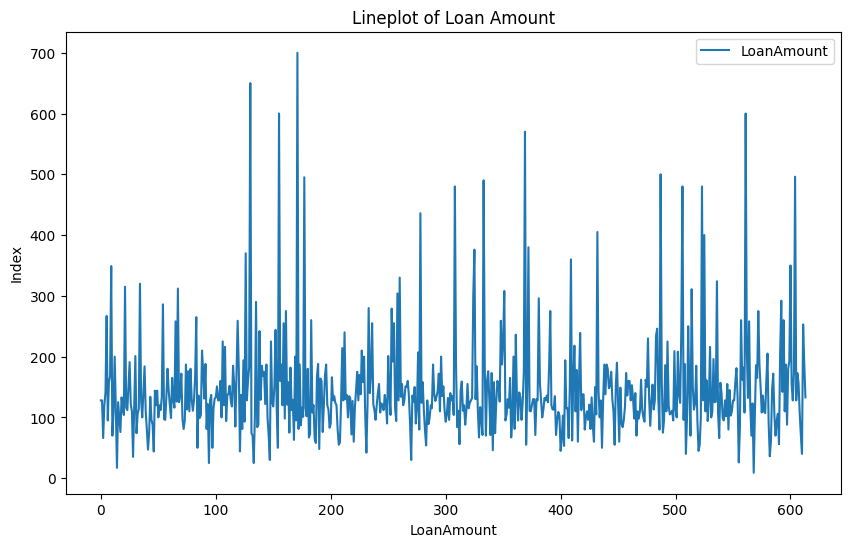

In [176]:
plt.figure(figsize=(10,6))
plt.plot(df['LoanAmount'], label = 'LoanAmount')
plt.title("Lineplot of Loan Amount")
plt.xlabel('LoanAmount')
plt.ylabel('Index')
plt.legend()
plt.show()

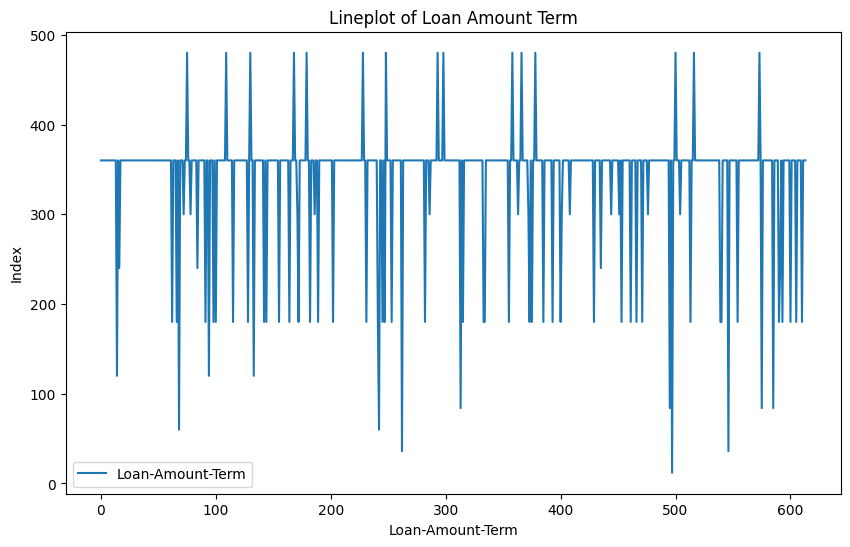

In [177]:
plt.figure(figsize = (10,6))
plt.plot(df['Loan_Amount_Term'], label  = 'Loan-Amount-Term')
plt.title("Lineplot of Loan Amount Term")
plt.xlabel('Loan-Amount-Term')
plt.ylabel('Index')
plt.legend()
plt.show()

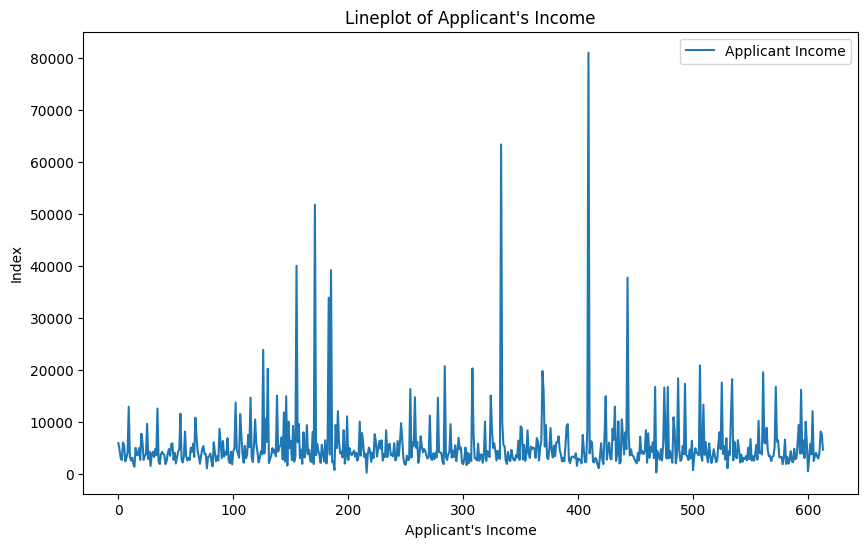

In [178]:
plt.figure(figsize = (10,6))
plt.plot(df['ApplicantIncome'], label = 'Applicant Income')
plt.title("Lineplot of Applicant's Income")
plt.xlabel("Applicant's Income")
plt.ylabel("Index")
plt.legend()
plt.show()

***2. Scatterplot***

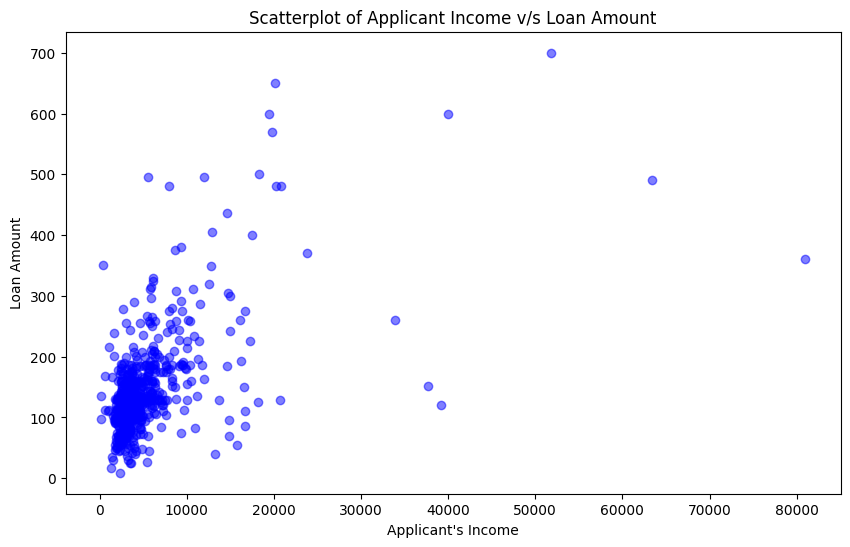

In [179]:
plt.figure(figsize = (10,6))
plt.scatter(df['ApplicantIncome'], df ['LoanAmount'], c = 'Blue', alpha=0.5)
plt.title("Scatterplot of Applicant Income v/s Loan Amount")
plt.xlabel("Applicant's Income")
plt.ylabel("Loan Amount")
plt.show()

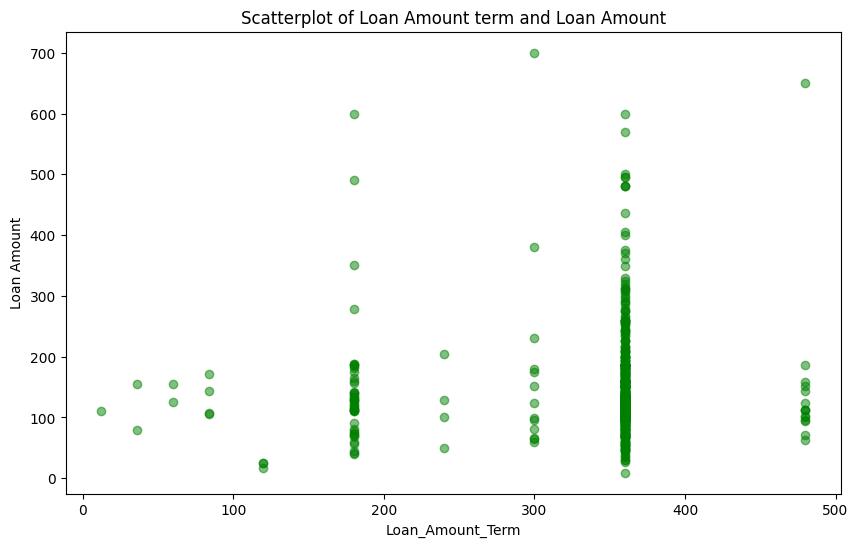

In [180]:
plt.figure(figsize = (10,6))
plt.scatter(df['Loan_Amount_Term'], df['LoanAmount'], c = 'green', alpha = 0.5)
plt.title("Scatterplot of Loan Amount term and Loan Amount")
plt.xlabel("Loan_Amount_Term")
plt.ylabel("Loan Amount")
plt.show()

***3. Barplot***

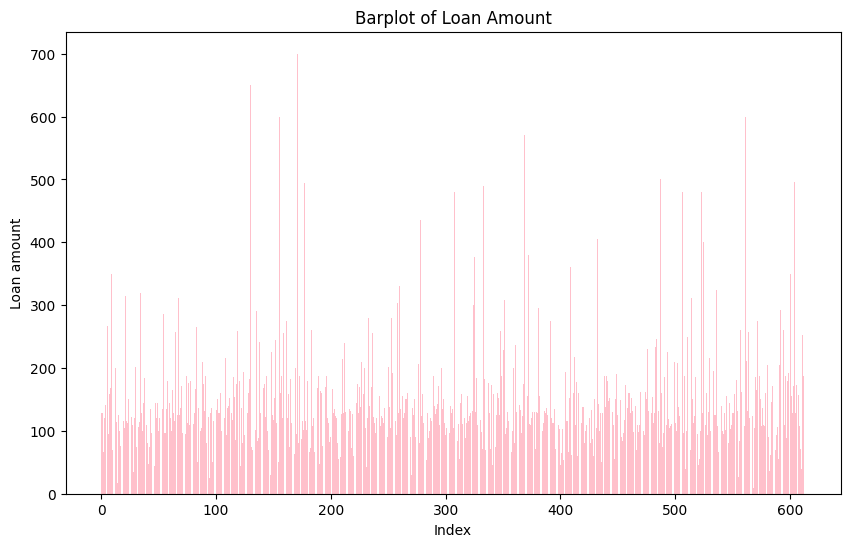

In [181]:
plt.figure(figsize = (10,6))
plt.bar(df.index,df['LoanAmount'], color = 'pink')
plt.title("Barplot of Loan Amount")
plt.ylabel("Loan amount")
plt.xlabel("Index")
plt.show()

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

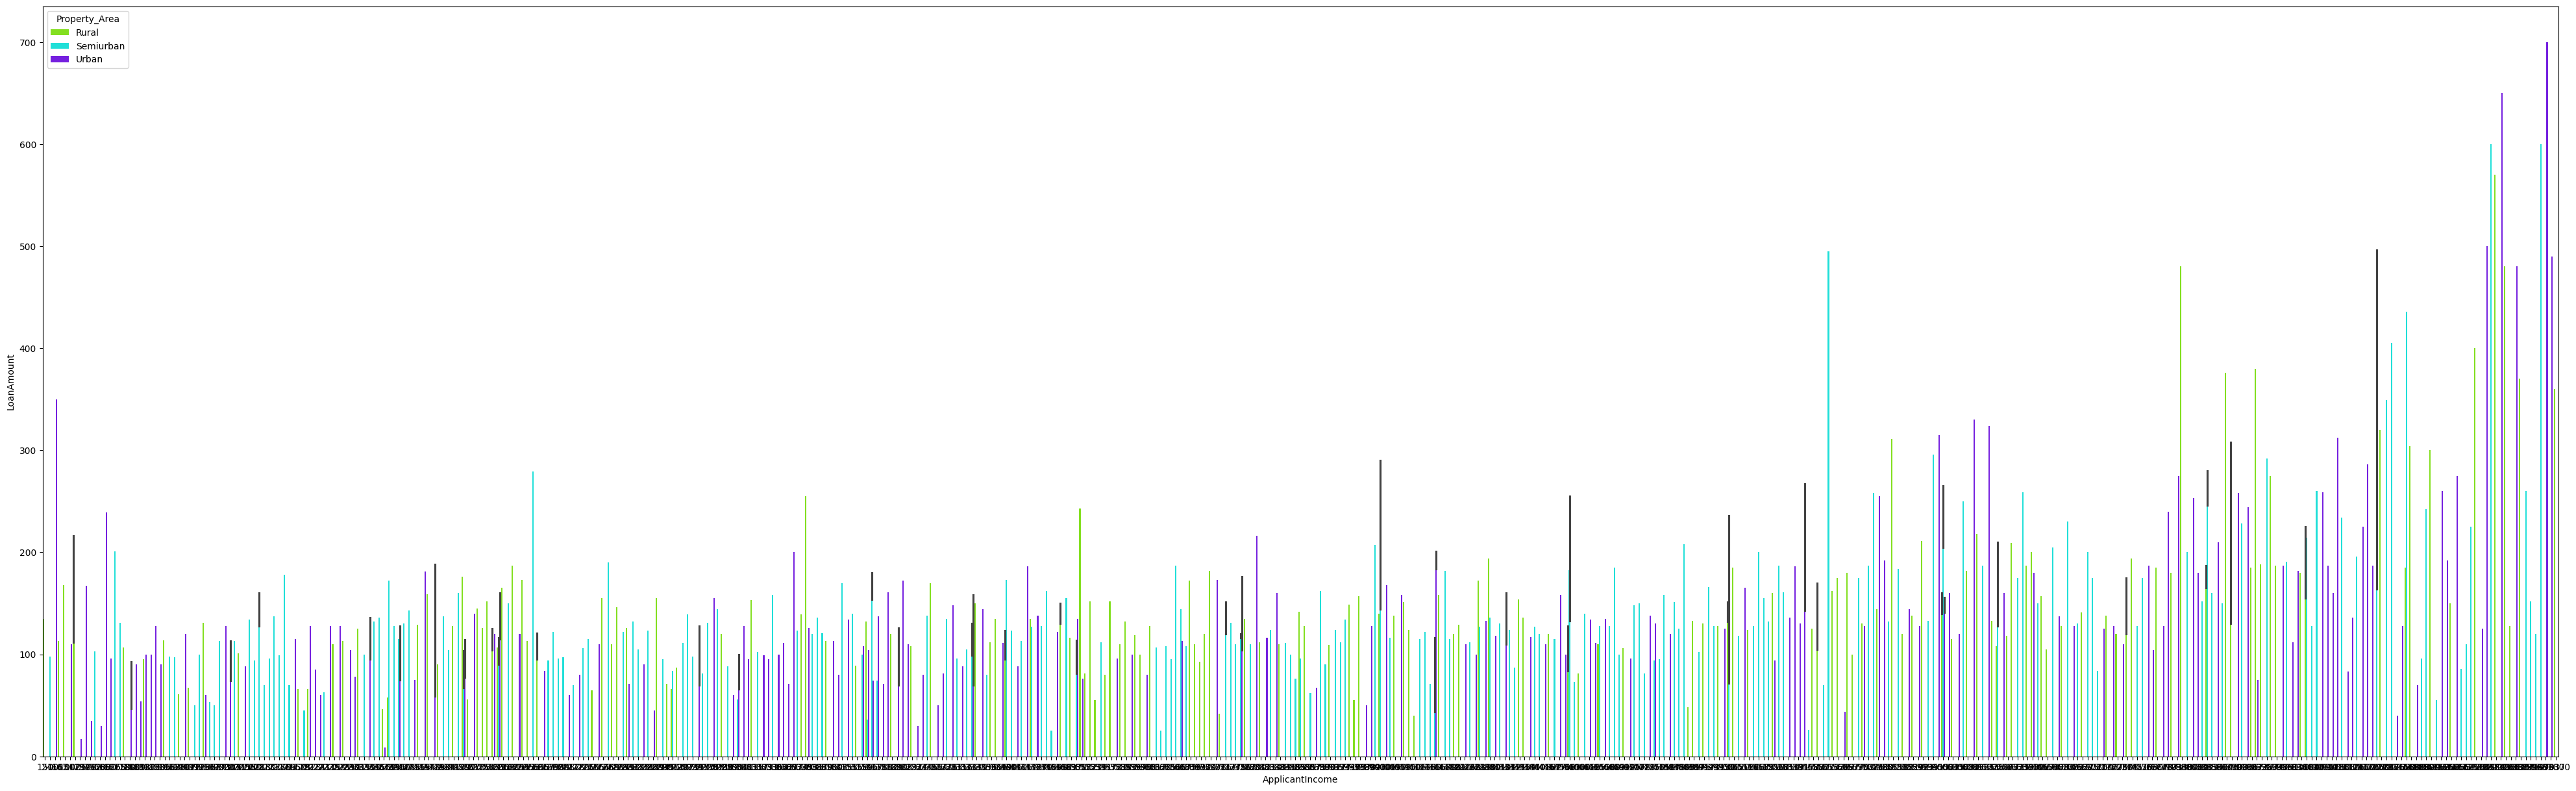

In [182]:
plt.figure(figsize = (50,15))
sns.barplot(x = 'ApplicantIncome', y = 'LoanAmount', hue = "Property_Area", data = df, palette = 'hsv')

<Axes: xlabel='Loan_Amount_Term', ylabel='Credit_History'>

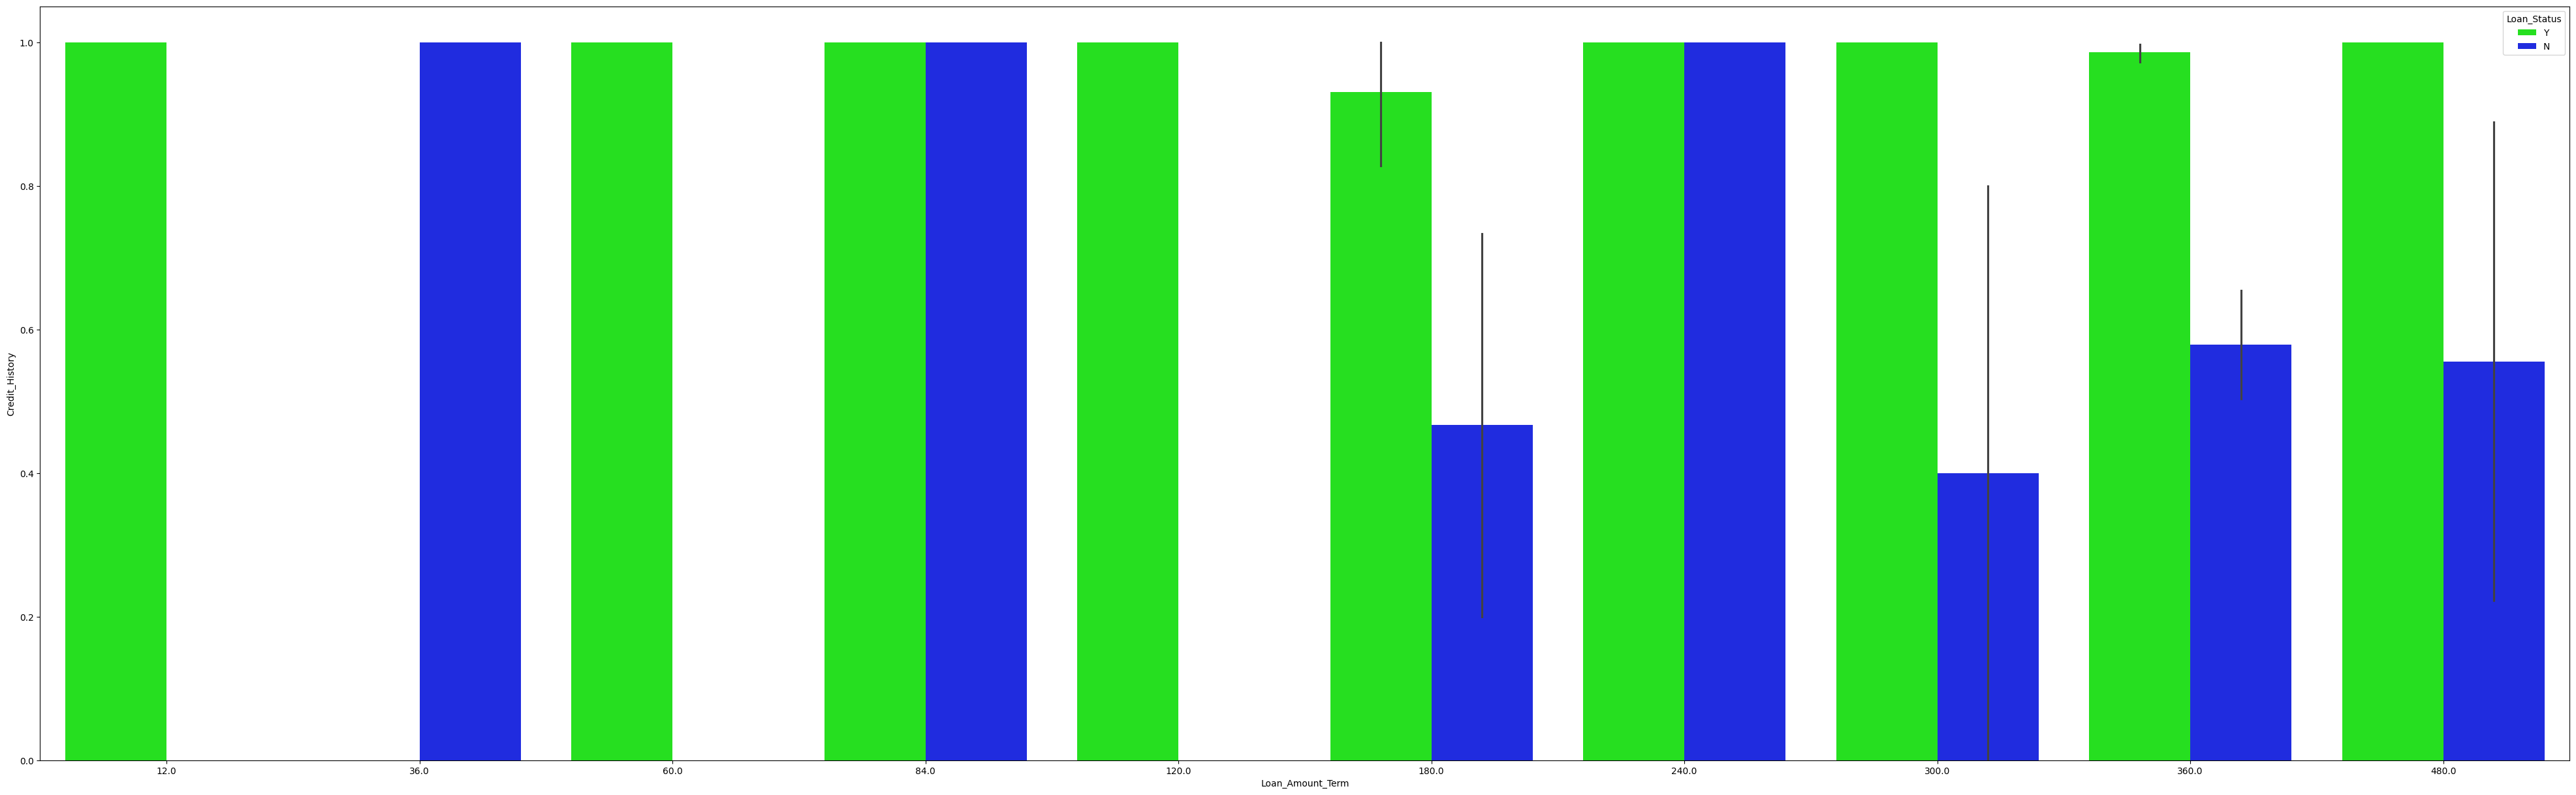

In [183]:
plt.figure(figsize = (50,15))
sns.barplot(x = 'Loan_Amount_Term', y = 'Credit_History', hue = "Loan_Status", data = df, palette = 'hsv')

***4. Histogram***

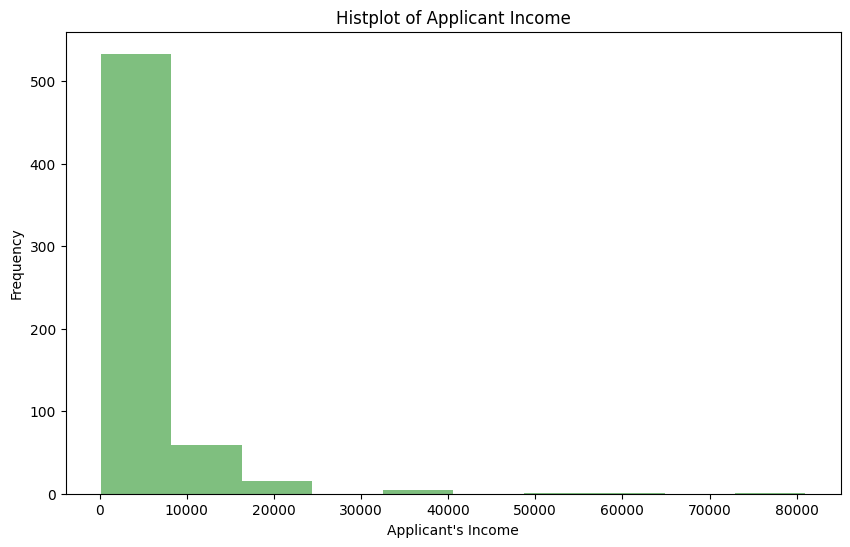

In [184]:
plt.figure(figsize = (10,6))
plt.hist(df['ApplicantIncome'], bins= 10, color = 'green', alpha = 0.5)
plt.title("Histplot of Applicant Income")
plt.xlabel("Applicant's Income")
plt.ylabel("Frequency")
plt.show()

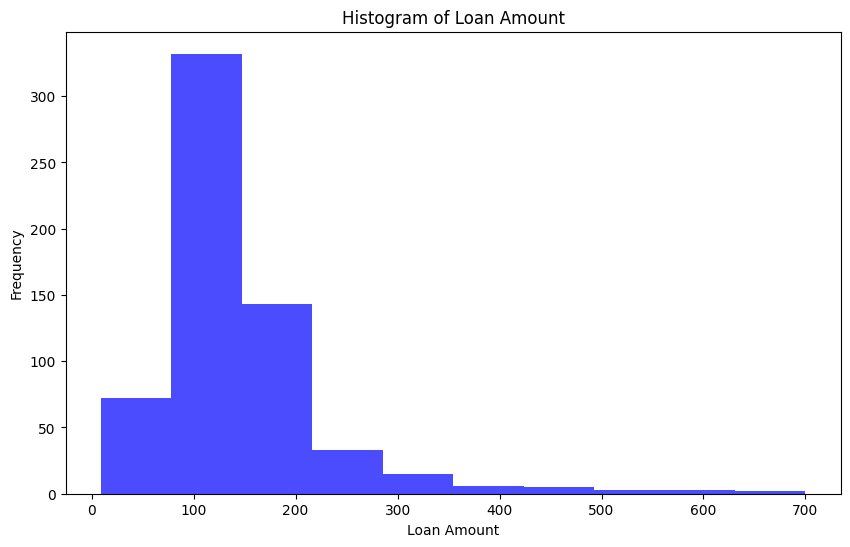

In [185]:
plt.figure(figsize = (10,6))
plt.hist(df['LoanAmount'], bins = 10, color = 'blue', alpha = 0.7)
plt.title("Histogram of Loan Amount")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()

***5. Boxplot***

C:\Users\gkris\AppData\Local\Temp\ipykernel_11992\346777277.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df['LoanAmount'], labels = ['Loan Amount'])


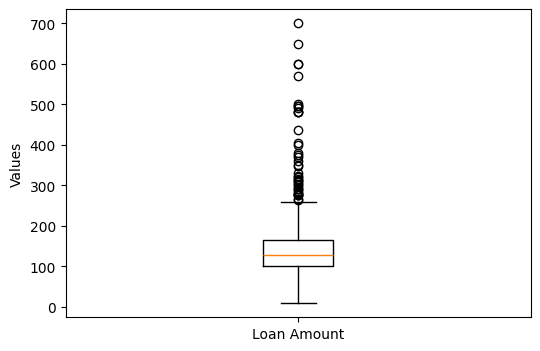

In [186]:
plt.figure(figsize = (6,4))
plt.boxplot(df['LoanAmount'], labels = ['Loan Amount'])
plt.ylabel("Values")
plt.show()

C:\Users\gkris\AppData\Local\Temp\ipykernel_11992\3596935517.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df['Loan_Amount_Term'], labels = ['Loan Amount Term'])


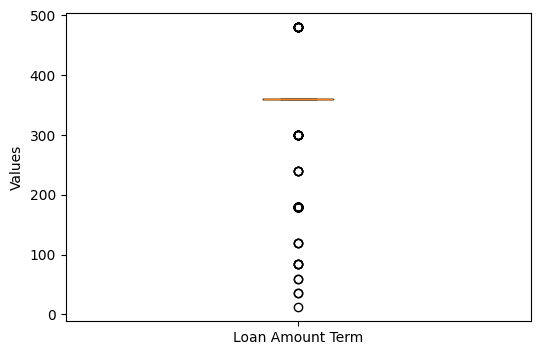

In [187]:
plt.figure(figsize = (6,4))
plt.boxplot(df['Loan_Amount_Term'], labels = ['Loan Amount Term'])
plt.ylabel("Values")
plt.show()

In [188]:
df[categorical_columns].columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

C:\Users\gkris\AppData\Local\Temp\ipykernel_11992\102643000.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Loan_Status', y = 'LoanAmount', data = df, palette = 'Set2')


<Axes: xlabel='Loan_Status', ylabel='LoanAmount'>

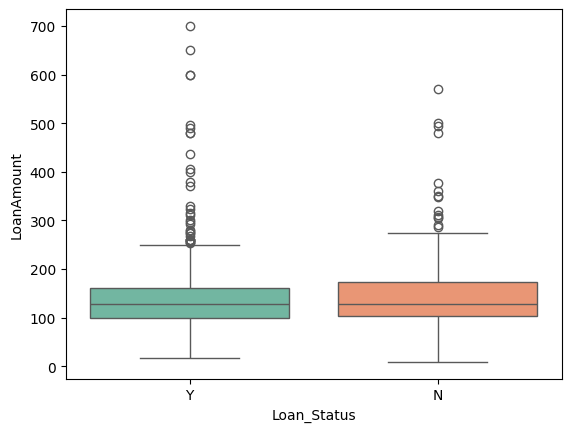

In [189]:
sns.boxplot(x = 'Loan_Status', y = 'LoanAmount', data = df, palette = 'Set2')

C:\Users\gkris\AppData\Local\Temp\ipykernel_11992\932913516.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Loan_Amount_Term', y = 'Gender', data = df, palette = 'hsv')


<Axes: xlabel='Loan_Amount_Term', ylabel='Gender'>

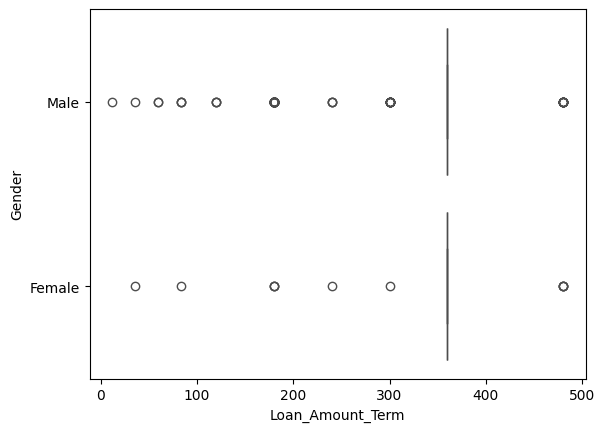

In [190]:
sns.boxplot(x = 'Loan_Amount_Term', y = 'Gender', data = df, palette = 'hsv')

***6. Heatmap***

In [191]:
df1 = df[['ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]
df1.corr()

,ApplicantIncome,LoanAmount,Loan_Amount_Term
ApplicantIncome,1.000000,0.565181,-0.046531
LoanAmount,0.565181,1.000000,0.036960
Loan_Amount_Term,-0.046531,0.036960,1.000000


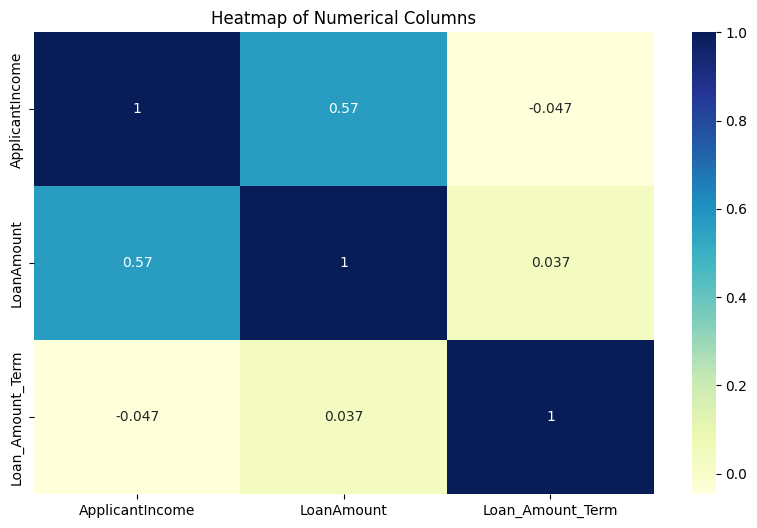

In [192]:
plt.figure(figsize = (10,6))
df1 = df[['ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]
sns.heatmap(df1.corr(), cmap = 'YlGnBu', annot = True)
plt.title("Heatmap of Numerical Columns")
plt.show()

***7. KDE plot***

C:\Users\gkris\AppData\Local\Temp\ipykernel_11992\908401363.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['LoanAmount'], shade = True, color = 'Blue')


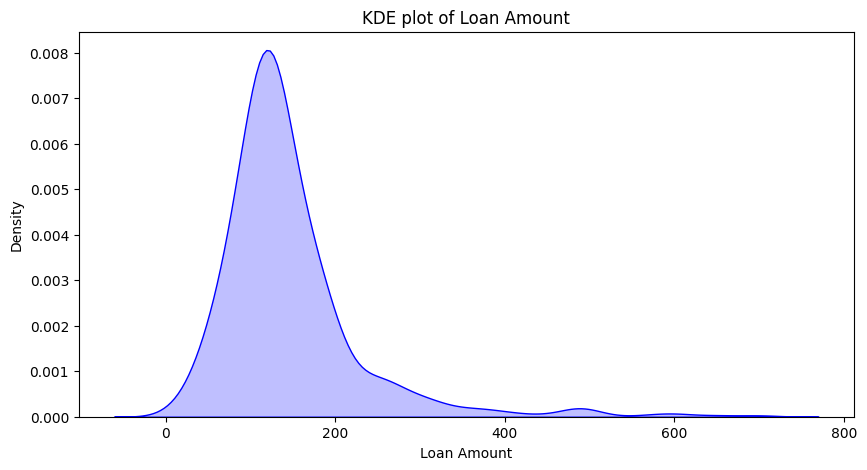

In [193]:
plt.figure(figsize = (10,5))
sns.kdeplot(df['LoanAmount'], shade = True, color = 'Blue')
plt.title('KDE plot of Loan Amount')
plt.xlabel('Loan Amount')
plt.show()

***8. Catplot***

C:\Users\gkris\AppData\Local\Temp\ipykernel_11992\598793143.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = 'Loan_Amount_Term', y = 'LoanAmount', data = df, palette = 'rainbow')


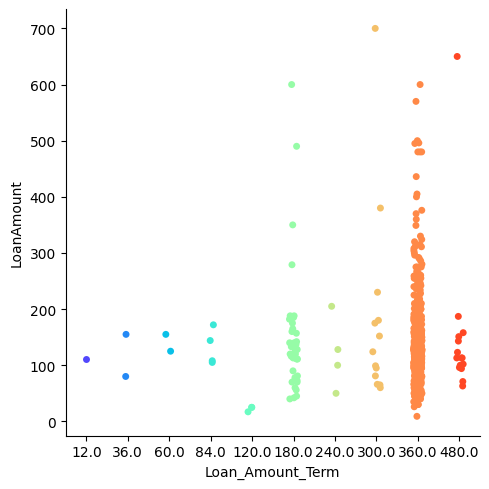

In [194]:
sns.catplot(x = 'Loan_Amount_Term', y = 'LoanAmount', data = df, palette = 'rainbow')

<Axes: xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

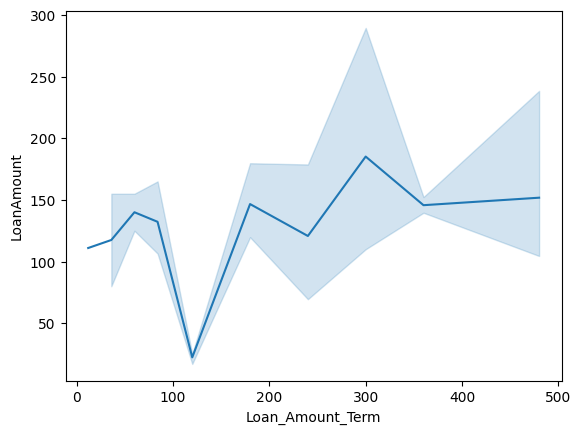

In [195]:
sns.lineplot(x = 'Loan_Amount_Term', y = "LoanAmount", data = df)

***9. Violin Plot***

C:\Users\gkris\AppData\Local\Temp\ipykernel_11992\136619587.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = 'Dependents', y = 'ApplicantIncome', kind = 'violin', data = df, palette = 'hsv')


<Figure size 1000x800 with 0 Axes>

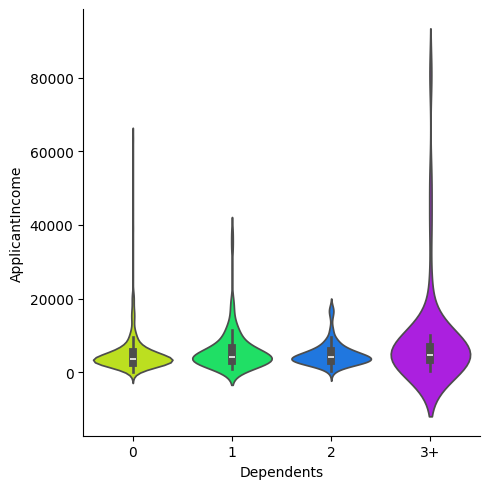

In [196]:
plt.figure(figsize = (10,8))
sns.catplot(x = 'Dependents', y = 'ApplicantIncome', kind = 'violin', data = df, palette = 'hsv')


C:\Users\gkris\AppData\Local\Temp\ipykernel_11992\3646107168.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = 'Property_Area', y = 'ApplicantIncome', kind = 'violin', data = df, palette = 'hsv')


<Figure size 1000x800 with 0 Axes>

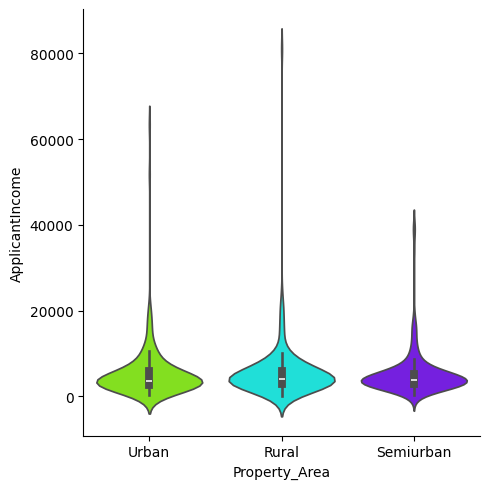

In [197]:
plt.figure(figsize = (10,8))
sns.catplot(x = 'Property_Area', y = 'ApplicantIncome', kind = 'violin', data = df, palette = 'hsv')


***10. CountPlot***

C:\Users\gkris\AppData\Local\Temp\ipykernel_11992\486164315.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = 'Education', kind = 'count', data = df, palette = 'Set1')


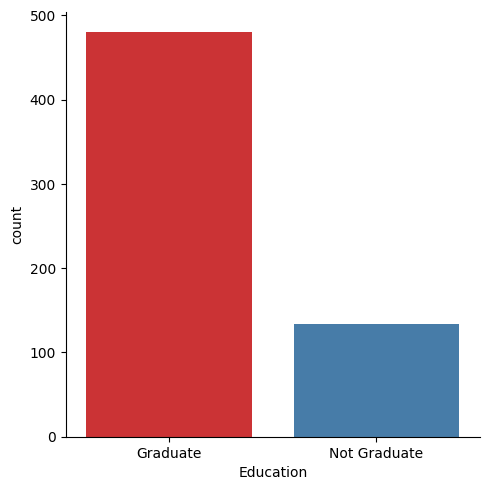

In [198]:
sns.catplot(x = 'Education', kind = 'count', data = df, palette = 'Set1')

C:\Users\gkris\AppData\Local\Temp\ipykernel_11992\248964494.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = 'Married', data=df, kind = 'count', palette = 'hsv')


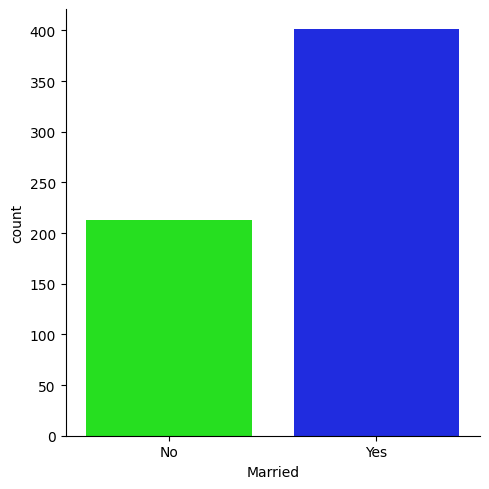

In [199]:
sns.catplot(x = 'Married', data=df, kind = 'count', palette = 'hsv')

***11. Swarmplot***

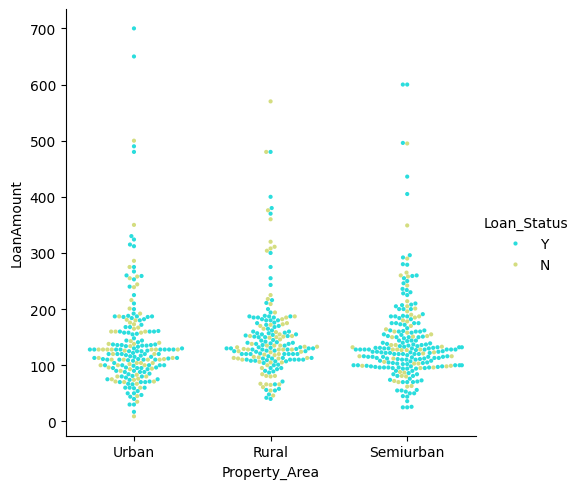

In [200]:
sns.catplot(x = 'Property_Area', y= 'LoanAmount', kind = 'swarm', data = df, palette = 'rainbow', hue = 'Loan_Status', size = 3)

In [201]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<Axes: xlabel='LoanAmount', ylabel='Loan_Amount_Term'>

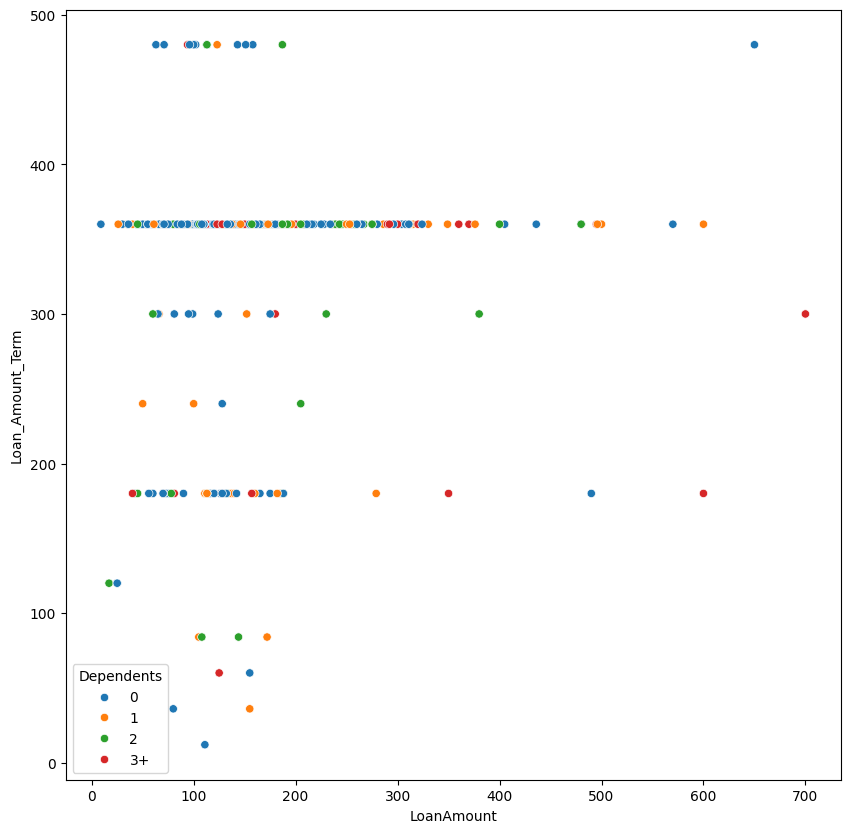

In [202]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = 'LoanAmount', y = 'Loan_Amount_Term', hue = 'Dependents', data = df)

### Correlationships

### Numerical Columns Correlationship

In [203]:
df_num.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000


In [204]:
df_num['Ls'] = df_cat['Loan_Status']

C:\Users\gkris\AppData\Local\Temp\ipykernel_11992\2079634421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['Ls'] = df_cat['Loan_Status']


In [205]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Ensure df_num['Ls'] is a 1-dimensional array
if df_num['Ls'].ndim == 1:
    le = LabelEncoder()
    df_num['Ls'] = le.fit_transform(df_num['Ls'])
else:
    raise ValueError("df_num['Ls'] is not a 1-dimensional array")

C:\Users\gkris\AppData\Local\Temp\ipykernel_11992\3619232906.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['Ls'] = le.fit_transform(df_num['Ls'])


In [206]:
df_num_corr = df_num.corr()

In [207]:
df_num_corr['Ls']

ApplicantIncome     -0.004710
CoapplicantIncome   -0.059187
LoanAmount          -0.033214
Loan_Amount_Term    -0.022549
Credit_History       0.540556
Ls                   1.000000
Name: Ls, dtype: float64

In [208]:
df_num_cols = []
df_num_cols.extend(df_num_corr[(df_num_corr["Ls"]>0.3)].index.values)
df_num_cols.extend(df_num_corr[(df_num_corr["Ls"]<-0.3) ].index.values)

In [209]:
df_num_cols

['Credit_History', 'Ls']

### Categorical Columns Correlationship

In [210]:
df_cat

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [211]:
from scipy.stats import f_oneway

## Performing One way ANOVA test

In [212]:
# Convert 'Loan_Status' to numerical values
df_cat['Loan_Status_Num'] = df_cat['Loan_Status'].map({'Y': 1, 'N': 0})

# Group by 'Education' and get the 'Loan_Status_Num' values
groups  = [df_cat['Loan_Status_Num'][df_cat['Education'] == category] for category in df_cat['Education'].unique()]

# Perform ANOVA test
f_stat, p_value = f_oneway(*groups)
print(f"F_Statistic : {f_stat}, P-Value : {p_value}")

F_Statistic : 4.547684575841726, P-Value : 0.03336067753728906


C:\Users\gkris\AppData\Local\Temp\ipykernel_11992\2903523203.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['Loan_Status_Num'] = df_cat['Loan_Status'].map({'Y': 1, 'N': 0})


In [213]:
c_list=[]
nc_list=[]
for c1 in list(df_cat.columns):
    if c1 == 'Loan_Status' or c1 == 'Loan_Status_Num':
        continue
    else:
        groups = [df_cat['Loan_Status_Num'][df_cat[c1] == category] for category in df_cat[c1].unique()]
        f_stat, p_value = f_oneway(*groups)
        print(f"column : {c1}, F-statistic: {f_stat}, P-value: {p_value}")
        if p_value < 0.05:
            c_list.append(c1)
        else:
            nc_list.append(c1)
        

column : Loan_ID, F-statistic: nan, P-value: nan
column : Gender, F-statistic: 0.19805868994529022, P-value: 0.656449758464281
column : Married, F-statistic: 5.164551722656315, P-value: 0.02339836279661985
column : Dependents, F-statistic: 1.0490070085062186, P-value: 0.3703188306348489
column : Education, F-statistic: 4.547684575841726, P-value: 0.03336067753728906
column : Self_Employed, F-statistic: 0.00838037719537718, P-value: 0.9270899835542965
column : Property_Area, F-statistic: 6.243824207425567, P-value: 0.002068617689238754


C:\Users\gkris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:567: SmallSampleWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  if is_too_small(samples, kwds):
C:\Users\gkris\AppData\Local\Temp\ipykernel_11992\4284713986.py:8: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_stat, p_value = f_oneway(*groups)


In [214]:
c_list        #columns influencing the target column

['Married', 'Education', 'Property_Area']

In [215]:
nc_list       # columns not influencing the target column

['Loan_ID', 'Gender', 'Dependents', 'Self_Employed']

***1. Label Encoding***

In [216]:
df_cat_e = df_cat.apply(le.fit_transform)

In [217]:
df_cat_e.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,Loan_Status_Num
0,0,1,0,0,0,0,2,1,1
1,1,1,1,1,0,0,0,0,0
2,2,1,1,0,0,1,2,1,1
3,3,1,1,0,1,0,2,1,1
4,4,1,0,0,0,0,2,1,1


***2. One hot encoding (Method 1)***

In [218]:
df_encoded = pd.get_dummies(df_cat, columns = df_cat.columns)
df_encoded.shape

(614, 633)

In [219]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')

In [220]:
encoded_array = encoder.fit_transform(df_cat)
encoded_df = pd.DataFrame(encoded_array, columns = encoder.get_feature_names_out(df_cat.columns))
encoded_df.shape


(614, 633)

***Outlier Treatment IQR***

In [221]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
        Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1               # Interquartile range
        lower_bound = Q1 - 1.5 * IQR  # Lower bound
        upper_bound = Q3 + 1.5 * IQR  # Upper bound

        # Remove outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

In [222]:
df_num.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Ls'],
      dtype='object')

In [223]:
columns_to_check = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']

df_no_outliers = remove_outliers_iqr(df_num, columns_to_check)

print("Original DataFrame:")
print(df_num.shape)
print("\nDataFrame after Outlier Treatment:")
print(df_no_outliers.shape)

Original DataFrame:
(614, 6)

DataFrame after Outlier Treatment:
(383, 6)
